In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from xgboost import XGBRegressor
import joblib

In [ ]:
# load the dataset
df = pd.read_csv('dataset/home_data.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.drop(['id', 'date'], axis=1, inplace=True)
df.head(5) 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [5]:
df.shape


(21613, 19)

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.isnull().sum()  

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  int64  
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  int64  
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [9]:
# renaming the column yr_built to house_age and changing its values
df.rename(columns={'yr_built':'house_age'},inplace=True)
df['house_age'] = 2025 - df['house_age']
df.head(5) 
# # changing the column yr_renovated to renovated and changing the values to 0 and 1
df.rename(columns={'yr_renovated':'renovated'},inplace=True)
df['renovated'] = df['renovated'].apply(lambda x: 0 if x == 0 else 1)
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,house_age,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,70,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,74,1,98125,47.7210,-122.319,1690,7639
2,180000,2,1,770,10000,1,0,0,3,6,770,0,92,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,60,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,38,0,98074,47.6168,-122.045,1800,7503


In [10]:
# using simple feature scaling
df['sqft_living'] = df['sqft_living']/df['sqft_living'].max()
df['sqft_living15'] = df['sqft_living15']/df['sqft_living15'].max()
df['sqft_lot'] = df['sqft_lot']/df['sqft_lot'].max()
df['sqft_above'] = df['sqft_above']/df['sqft_above'].max()
df['sqft_basement'] = df['sqft_basement']/df['sqft_basement'].max()
df['sqft_lot15'] = df['sqft_lot15']/df['sqft_lot15'].max()
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,house_age,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1,0.087149,0.003421,1,0,0,3,7,0.125399,0.000000,70,0,98178,47.5112,-122.257,0.215781,0.006485
1,538000,3,2,0.189808,0.004385,2,0,0,3,7,0.230606,0.082988,74,1,98125,47.7210,-122.319,0.272142,0.008768
2,180000,2,1,0.056869,0.006056,1,0,0,3,6,0.081828,0.000000,92,0,98028,47.7379,-122.233,0.438003,0.009254
3,604000,4,3,0.144756,0.003028,1,0,0,5,7,0.111583,0.188797,60,0,98136,47.5208,-122.393,0.219002,0.005739
4,510000,3,2,0.124077,0.004893,1,0,0,3,8,0.178533,0.000000,38,0,98074,47.6168,-122.045,0.289855,0.008612


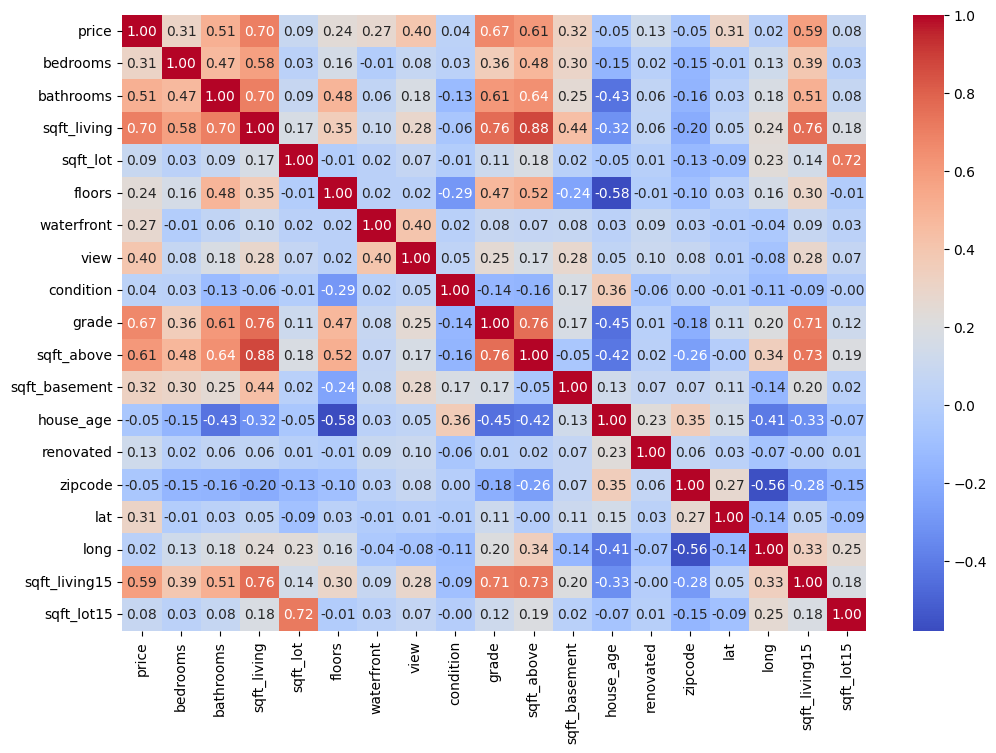

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [12]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.510072
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.237211
renovated        0.126092
sqft_lot         0.089661
sqft_lot15       0.082447
condition        0.036362
long             0.021626
zipcode         -0.053203
house_age       -0.054012
Name: price, dtype: float64

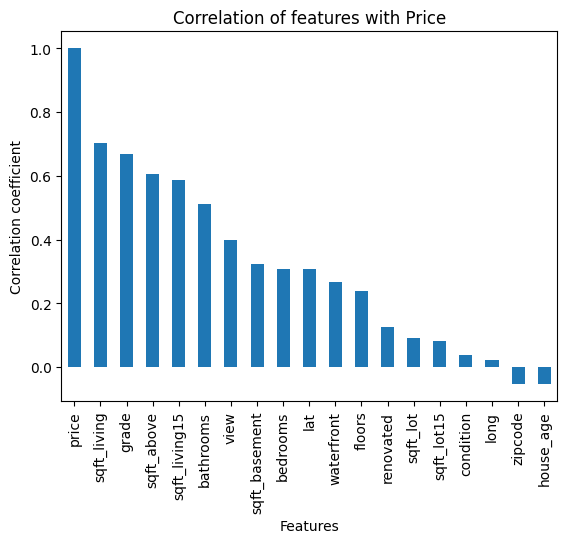

In [13]:
df.corr()['price'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of features with Price')     
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16196\465268634.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='floors', y='price', data=df , palette='Set2',ax=ax[2,2])
C:\Users\Admin\AppData\Local\Temp\ipykernel_16196\465268634.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='condition', y='price', data=df, palette='Set2', ax=ax[2,3])
C:\Users\Admin\AppData\Local\Temp\ipykernel_16196\465268634.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='view', y='price', data=df, palette='Set2', ax=ax[3,0])
C:\Users\Admin\AppData\Loca

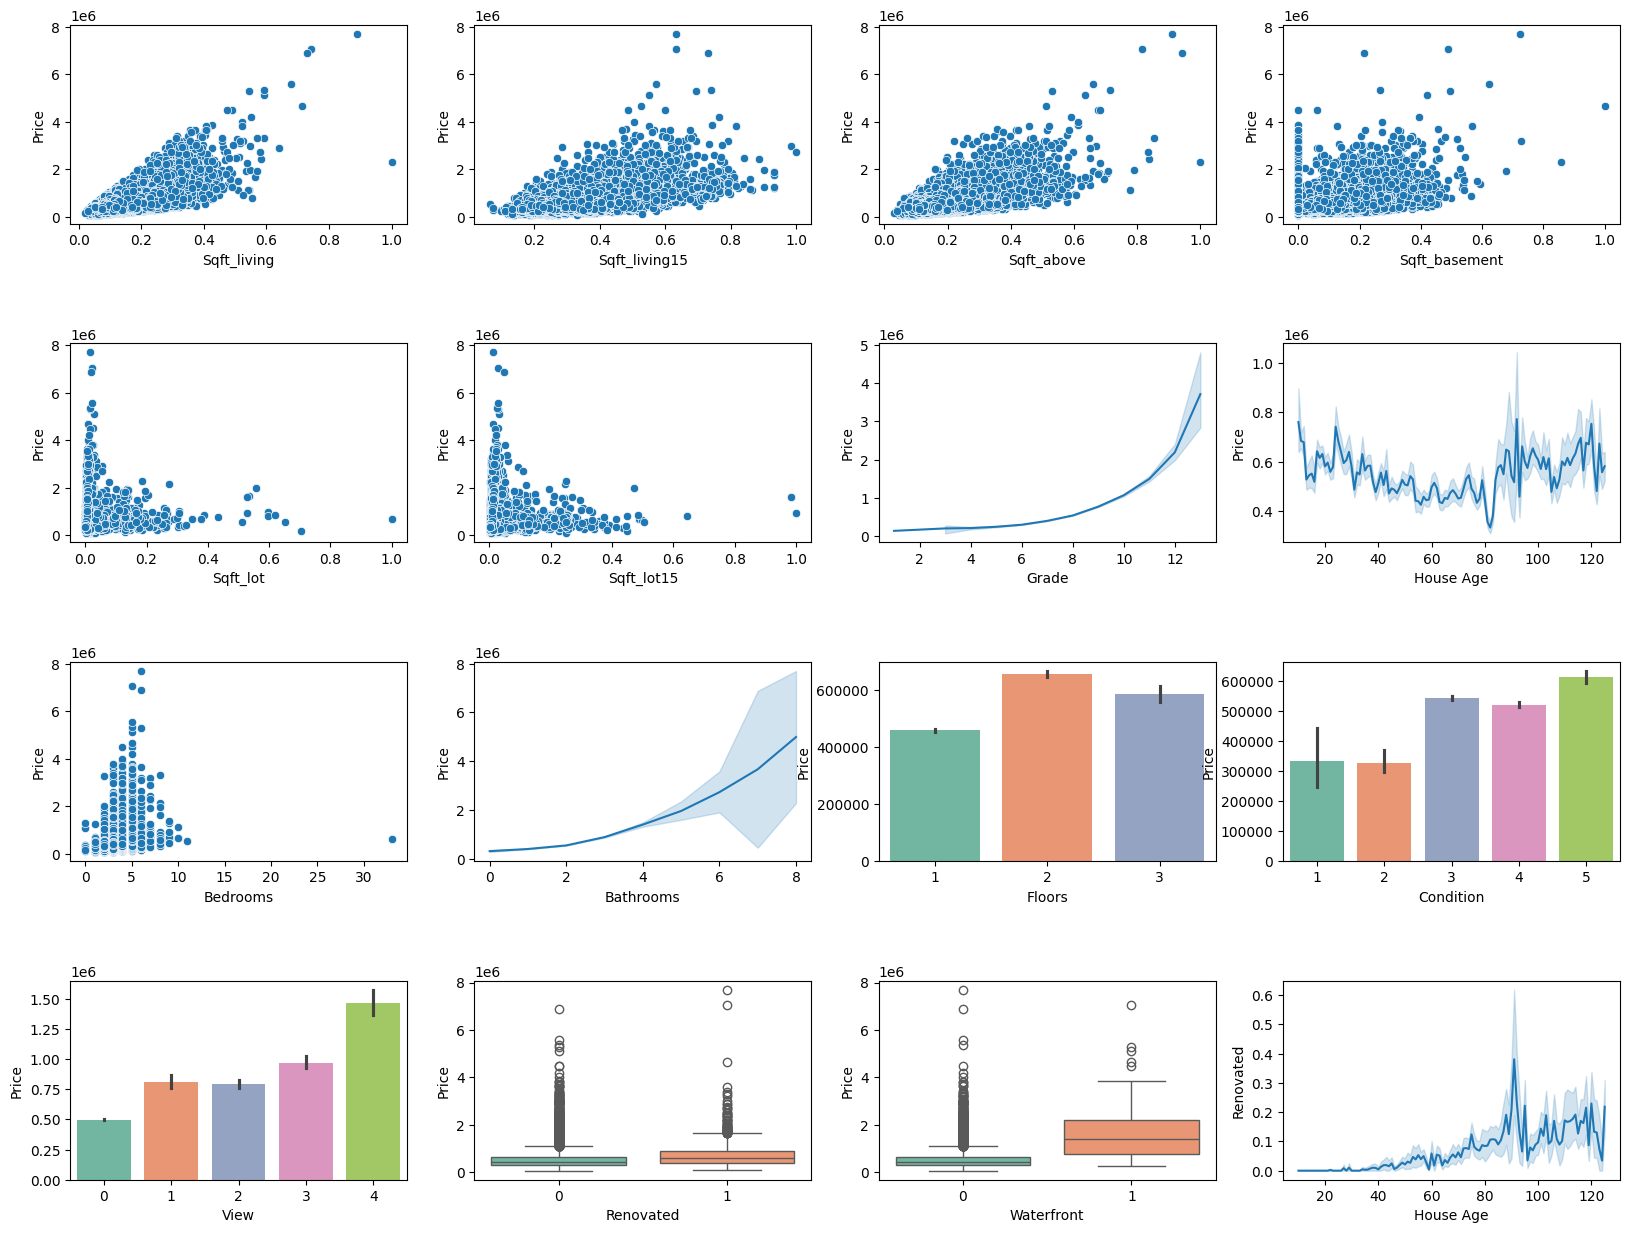

In [14]:
fig, ax = plt.subplots(4,4, figsize=(20,15))
plt.subplots_adjust(hspace=0.6)
sns.scatterplot(x='sqft_living', y='price', data=df,ax=ax[0,0])  
ax[0,0].set_xlabel('Sqft_living')
ax[0,0].set_ylabel('Price')
sns.scatterplot(x='sqft_living15', y='price', data=df, ax=ax[0,1])   
ax[0,1].set_xlabel('Sqft_living15')
ax[0,1].set_ylabel('Price')
sns.scatterplot(x='sqft_above', y='price', data=df, ax=ax[0,2])
ax[0,2].set_xlabel('Sqft_above')
ax[0,2].set_ylabel('Price')
sns.scatterplot(x='sqft_basement', y='price', data=df, ax=ax[0,3])
ax[0,3].set_xlabel('Sqft_basement')
ax[0,3].set_ylabel('Price')
sns.scatterplot(x='sqft_lot', y='price', data=df, ax=ax[1,0]) 
ax[1,0].set_xlabel('Sqft_lot')
ax[1,0].set_ylabel('Price')
sns.scatterplot(x='sqft_lot15', y='price', data=df, ax=ax[1,1])  
ax[1,1].set_xlabel('Sqft_lot15')
ax[1,1].set_ylabel('Price')
sns.lineplot(x='grade', y='price', data=df, ax=ax[1,2])  
ax[1,2].set_xlabel('Grade')
ax[1,2].set_ylabel('Price')
sns.lineplot(x='house_age', y='price', data=df, ax=ax[1,3])   
ax[1,3].set_xlabel('House Age')
ax[1,3].set_ylabel('Price')
sns.scatterplot(x='bedrooms', y='price', data=df, ax=ax[2,0])  
ax[2,0].set_xlabel('Bedrooms')
ax[2,0].set_ylabel('Price')
sns.lineplot(x='bathrooms', y='price', data=df, ax=ax[2,1])
ax[2,1].set_xlabel('Bathrooms')
ax[2,1].set_ylabel('Price')
sns.barplot(x='floors', y='price', data=df , palette='Set2',ax=ax[2,2])
ax[2,2].set_xlabel('Floors')
ax[2,2].set_ylabel('Price')
sns.barplot(x='condition', y='price', data=df, palette='Set2', ax=ax[2,3])
ax[2,3].set_xlabel('Condition')
ax[2,3].set_ylabel('Price')
sns.barplot(x='view', y='price', data=df, palette='Set2', ax=ax[3,0])
ax[3,0].set_xlabel('View')
ax[3,0].set_ylabel('Price')
sns.boxplot(x='renovated', y='price', data=df, palette='Set2', ax=ax[3,1])
ax[3,1].set_xlabel('Renovated')
ax[3,1].set_ylabel('Price') 
sns.boxplot(x='waterfront', y='price', data=df, palette='Set2',ax=ax[3,2]) 
ax[3,2].set_xlabel('Waterfront')
ax[3,2].set_ylabel('Price')
sns.lineplot(x='house_age', y='renovated', data=df, ax=ax[3,3]) 
ax[3,3].set_xlabel('House Age')
ax[3,3].set_ylabel('Renovated')
plt.show()



In [15]:
# Adding price range column into dataset
df['price_range'] = pd.cut(df['price'],
                           bins=[0,321950,450000,645000,1295648,4497824],
                           labels=['Very Low','Low','Medium','High','Very High'])
df[['price','price_range']].sample(9)

,price,price_range
5744,404500,Low
21218,465000,Medium
13744,409000,Low
136,220000,Very Low
10716,392000,Low
1086,550000,Medium
15376,1220000,High
10125,700000,High
14739,270000,Very Low


In [16]:
map = folium.Map(location=[47.5480, -121.9836],zoom_start=8)
marker_cluster = FastMarkerCluster(df[['lat', 'long']].values.tolist()).add_to(map)
map

In [17]:
# Preparing data for modeling
df.drop(['price_range'],axis=1,inplace=True)
X = df.drop('price', axis=1)   
y = df['price']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Linear Regression
input = ([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('lr', LinearRegression())
])
pipe = Pipeline(input)
pipe.fit(X_train, y_train)
ypipe_pred = pipe.predict(X_test)
# Evaluating the model
mse = mean_squared_error(y_test, ypipe_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ypipe_pred)
mae = mean_absolute_error(y_test, ypipe_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 30415841455.81704
Root Mean Squared Error: 174401.38031511402
R^2 Score: 0.7988060382891304
Mean Absolute Error: 104244.46367959664


In [19]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
# Evaluating the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Ridge Mean Squared Error: {mse_ridge}')
print(f'Ridge Root Mean Squared Error: {rmse_ridge}')
print(f'Ridge R^2 Score: {r2_ridge}')   
print(f'Ridge Mean Absolute Error: {mae_ridge}')

Ridge Mean Squared Error: 45067313754.43546
Ridge Root Mean Squared Error: 212290.6351077114
Ridge R^2 Score: 0.7018898388495014
Ridge Mean Absolute Error: 127487.65322618023


In [20]:
# Rabndom Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
# Evaluating the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest Root Mean Squared Error: {rmse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')
print(f'Random Forest Mean Absolute Error: {mae_rf}')


Random Forest Mean Squared Error: 22003554576.74303
Random Forest Root Mean Squared Error: 148335.95173370154
Random Forest R^2 Score: 0.8544514271141559
Random Forest Mean Absolute Error: 72756.75159359958


In [21]:
# Hyperparameter tuning of RF

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_dist = {
    'n_estimators':[100,200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=40,                 # good balance for your dataset
    cv=5,
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)
best_rf = rf_random.best_estimator_

print("Best Parameters:")
print(rf_random.best_params_)
y_pred_best_rf = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred_best_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_best_rf)
mae = mean_absolute_error(y_test, y_pred_best_rf)

print(f"Tuned RF MAE: {mae}")
print(f"Tuned RF MSE: {mse}")
print(f"Tuned RF RMSE: {rmse}")
print(f"Tuned RF R²: {r2}")


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters:
{'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Tuned RF MAE: 74077.71061818098
Tuned RF MSE: 22072280979.463528
Tuned RF RMSE: 148567.42906661448
Tuned RF R²: 0.853996817391865


In [22]:
# XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
# Evaluating the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print('XGBoost Mean Squared Error:',round(mse_xgb,2))
print(f'XGBoost Root Mean Squared Error: {rmse_xgb:.4f}')
print(f'XGBoost R^2 Score: {r2_xgb}')
print(f'XGBoost Mean Absolute Error: {mae_xgb}')

XGBoost Mean Squared Error: 20883933184.0
XGBoost Root Mean Squared Error: 144512.7440
XGBoost R^2 Score: 0.8618574738502502
XGBoost Mean Absolute Error: 70577.65625


In [23]:
# Hyprtparameter tuning of XGBoost Regressor
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

param_dist = {
    'n_estimators': randint(300, 700),
    'max_depth': randint(4, 9),
    'learning_rate': uniform(0.03, 0.07),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'min_child_weight': randint(1, 6),
    'gamma': uniform(0, 0.3)
}

xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,        # ⬅ FAST
    cv=3,
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

xgb_random.fit(X_train, y_train)

best_xgb = xgb_random.best_estimator_

print("Best params:", xgb_random.best_params_)
print("Best CV R²:", xgb_random.best_score_)
y_pred_best_xgb = best_xgb.predict(X_test)

print("Tuned XGB MAE:", mean_absolute_error(y_test, y_pred_best_xgb))
print('Tuned XGB MAE:', mean_squared_error(y_test,y_pred_best_xgb))
print("Tuned XGB RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best_xgb)))
print("Tuned XGB R²:", r2_score(y_test, y_pred_best_xgb))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'colsample_bytree': np.float64(0.9727961206236346), 'gamma': np.float64(0.07763399448000508), 'learning_rate': np.float64(0.07637655990477873), 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 559, 'subsample': np.float64(0.7554563366576581)}
Best CV R²: 0.8992295066515604
Tuned XGB MAE: 67629.609375
Tuned XGB MAE: 18270760960.0
Tuned XGB RMSE: 135169.37878084666
Tuned XGB R²: 0.8791429996490479


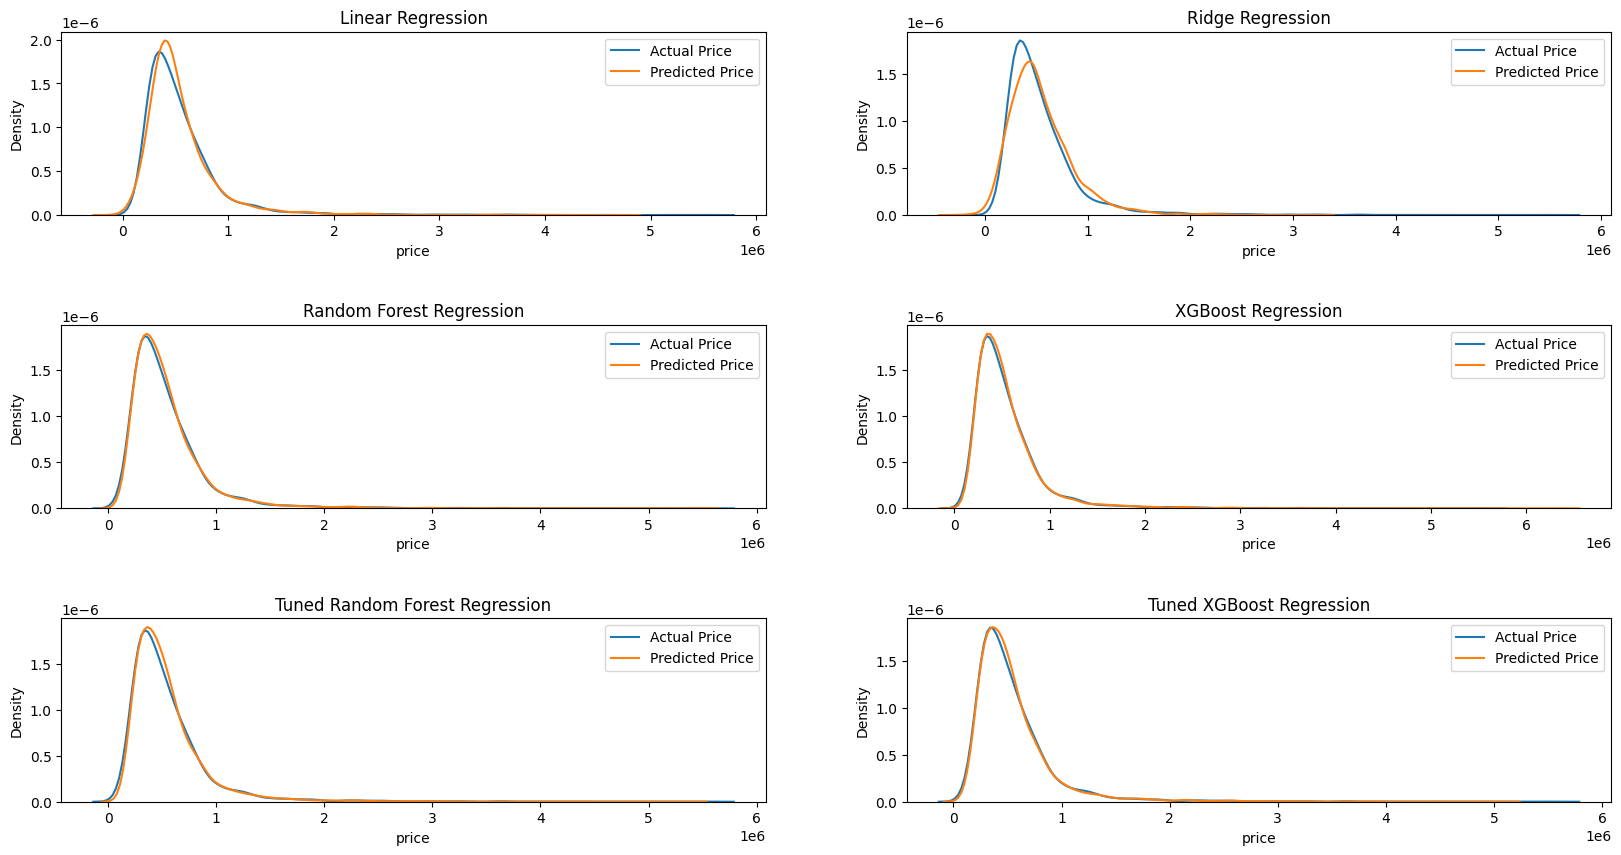

In [24]:
# All models displot (actual price vs predicted price)
fig, ax = plt.subplots(3,2,figsize=(20,10))
plt.subplots_adjust(hspace=0.6)
# Liner Regression
sns.kdeplot(y_test,ax=ax[0,0])
sns.kdeplot(ypipe_pred,ax=ax[0,0])
#Ridge REgression
sns.kdeplot(y_test,ax=ax[0,1])
sns.kdeplot(y_pred_ridge,ax=ax[0,1])
# Random Forrest
sns.kdeplot(y_test,ax=ax[1,0])
sns.kdeplot(y_pred_rf,ax=ax[1,0])
# XGBoost Regressor
sns.kdeplot(y_test,ax=ax[1,1])
sns.kdeplot(y_pred_xgb,ax=ax[1,1])
# Tuned Random Forest
sns.kdeplot(y_test,ax=ax[2,0])
sns.kdeplot(y_pred_best_rf,ax=ax[2,0])
# Tuned XGBoost Regressor
sns.kdeplot(y_test,ax=ax[2,1])
sns.kdeplot(y_pred_best_xgb,ax=ax[2,1])
# legends
ax[0,0].legend(['Actual Price','Predicted Price'])
ax[0,1].legend(['Actual Price','Predicted Price'])
ax[1,0].legend(['Actual Price','Predicted Price'])
ax[1,1].legend(['Actual Price','Predicted Price'])
ax[2,0].legend(['Actual Price','Predicted Price'])
ax[2,1].legend(['Actual Price','Predicted Price'])
#model name as title
ax[0,0].set_title('Linear Regression')
ax[0,1].set_title('Ridge Regression')
ax[1,0].set_title('Random Forest Regression')
ax[1,1].set_title('XGBoost Regression')
ax[2,0].set_title('Tuned Random Forest Regression')
ax[2,1].set_title('Tuned XGBoost Regression')
plt.show()

In [ ]:
# Model comparison table 
results = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Ridge Regression',
        'Random Forest',
        'XGBoost Regressor',
        'Tuned Random Forest',
        'Tuned XGBoost Regressor'
    ],
    'MAE': [
        mean_absolute_error(y_test, ypipe_pred),
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_xgb),
        mean_absolute_error(y_test, y_pred_best_rf),
        mean_absolute_error(y_test, y_pred_best_xgb)
    ],
    'MSE': [
        mean_squared_error(y_test, ypipe_pred),
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_xgb),
        mean_squared_error(y_test, y_pred_best_rf),
        mean_squared_error(y_test, y_pred_best_xgb)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, ypipe_pred)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
        np.sqrt(mean_squared_error(y_test, y_pred_best_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
    ],
    'R2 Score(close to 1 is better)': [
        r2_score(y_test, ypipe_pred),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_best_rf),
        r2_score(y_test, y_pred_best_xgb)
    ]
})

# Round values
results = results.round(3)
results = results.sort_values(by='R2 Score', ascending=False).reset_index(drop=True)
results

,Model,MAE,MSE,RMSE,R2 Score
0,Tuned XGBoost Regressor,67629.609,1.827076e+10,135169.379,0.879
1,XGBoost Regressor,70577.656,2.088393e+10,144512.744,0.862
2,Random Forest,72756.752,2.200355e+10,148335.952,0.854
3,Tuned Random Forest,74077.711,2.207228e+10,148567.429,0.854
4,Linear Regression,104244.464,3.041584e+10,174401.380,0.799
5,Ridge Regression,127487.653,4.506731e+10,212290.635,0.702


C:\Users\Admin\AppData\Local\Temp\ipykernel_16196\385829205.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest','XGBoost Regressor',
C:\Users\Admin\AppData\Local\Temp\ipykernel_16196\385829205.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest','XGBoost Regressor',
C:\Users\Admin\AppData\Local\Temp\ipykernel_16196\385829205.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Linear Regression','Ridge Regression','Random F

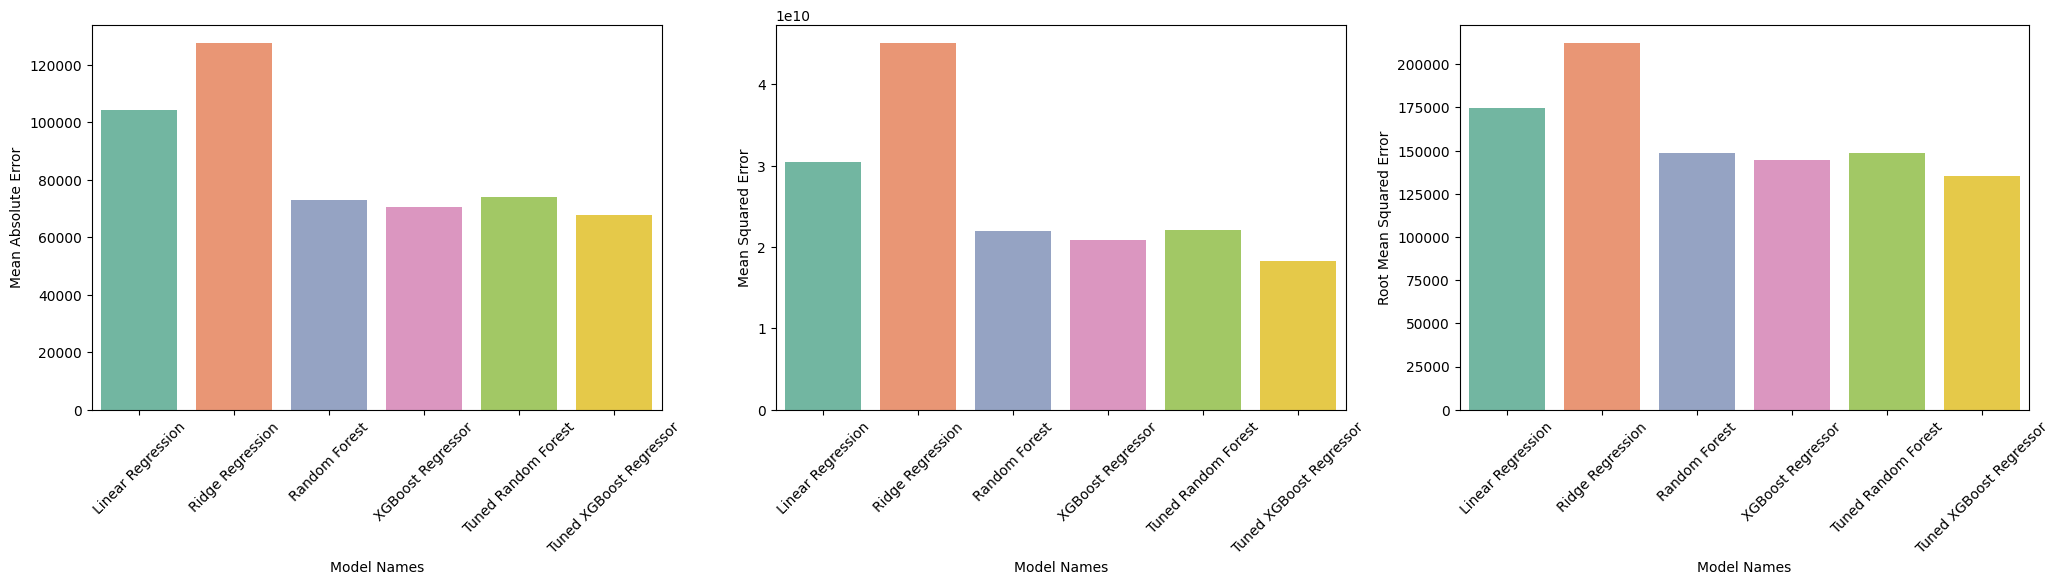

In [26]:
# All models mae, mse, rmse comparison
fig, ax = plt.subplots(1,3,figsize=(25,5))
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest','XGBoost Regressor',
               'Tuned Random Forest','Tuned XGBoost Regressor'],
            y=[mean_absolute_error(y_test,ypipe_pred),
               mean_absolute_error(y_test,y_pred_ridge),
               mean_absolute_error(y_test,y_pred_rf),
               mean_absolute_error(y_test,y_pred_xgb),
               mean_absolute_error(y_test, y_pred_best_rf),
               mean_absolute_error(y_test, y_pred_best_xgb)],
            palette='Set2',ax=ax[0])
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest','XGBoost Regressor',
               'Tuned Random Forest','Tuned XGBoost Regressor'],
            y=[mean_squared_error(y_test,ypipe_pred),
               mean_squared_error(y_test,y_pred_ridge),
               mean_squared_error(y_test,y_pred_rf),
               mean_squared_error(y_test,y_pred_xgb),
               mean_squared_error(y_test, y_pred_best_rf),
               mean_squared_error(y_test, y_pred_best_xgb)],
            palette='Set2',ax=ax[1])
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest','XGBoost Regressor',
               'Tuned Random Forest','Tuned XGBoost Regressor'],
            y=[np.sqrt(mean_squared_error(y_test,ypipe_pred)),
               np.sqrt(mean_squared_error(y_test,y_pred_ridge)),
               np.sqrt(mean_squared_error(y_test,y_pred_rf)),
               np.sqrt(mean_squared_error(y_test,y_pred_xgb)),
               np.sqrt(mean_squared_error(y_test, y_pred_best_rf)),
               np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))],
            palette='Set2',ax=ax[2])
# graph labels
ax[0].set_xlabel('Model Names')
ax[0].tick_params(axis='x', rotation=45)
ax[1].set_xlabel('Model Names')
ax[1].tick_params(axis='x', rotation=45)
ax[2].set_xlabel('Model Names')
ax[2].tick_params(axis='x', rotation=45)
ax[0].set_ylabel('Mean Absolute Error')
ax[1].set_ylabel('Mean Squared Error')
ax[2].set_ylabel('Root Mean Squared Error')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16196\293147955.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest Regression', 'XGBoost Regressor',


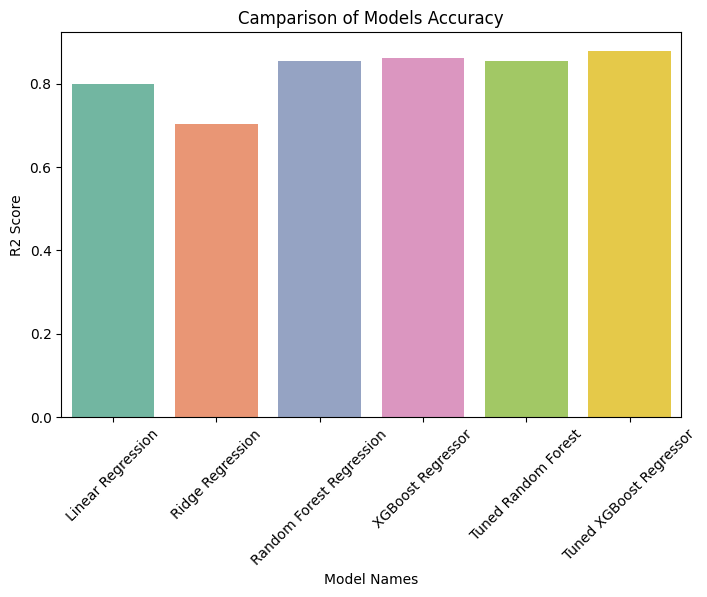

In [27]:
# All models accuracy comparison
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest Regression', 'XGBoost Regressor',
               'Tuned Random Forest','Tuned XGBoost Regressor'],
            y=[metrics.r2_score(y_test,ypipe_pred),
               metrics.r2_score(y_test,y_pred_ridge),
               metrics.r2_score(y_test,y_pred_rf),
               metrics.r2_score(y_test,y_pred_xgb),
               metrics.r2_score(y_test, y_pred_best_rf),
               metrics.r2_score(y_test, y_pred_best_xgb)],
            palette='Set2')
ax.set_title('Camparison of Models Accuracy')
ax.set_xlabel('Model Names')
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('R2 Score')

plt.show()

SAMPLE INPUT

In [28]:
bedrooms = 3
bathrooms = 2
sqft_living = 2000
sqft_lot = 10000
floors = 2
waterfront = 0
view = 0
condition = 3
grade = 8
sqft_above = 2000
sqft_basement = 0
yr_built = 1990
yr_renovated = 0
zipcode = 98001
lat = 47.5480
long = -121.9836
sqft_living15 = 2000
sqft_lot15 = 10000

MODEL TESTING ON SAMPLE DATA:

In [29]:
#predicting the price using random forest regression
price = rf_model.predict([[bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15]])
print('The price of the house is $',price[0])
#predicting the price using tuned random forest regression
price = best_rf.predict([[bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15]])
print('The price of the house is $',price[0])

The price of the house is $ 1850292.92
The price of the house is $ 1840592.2945833332


c:\Users\Admin\miniconda3\envs\houseprice-prediction\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Admin\miniconda3\envs\houseprice-prediction\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [30]:
#predicting the price using XGBoost regression
price = xgb_model.predict([[bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15]])
print('The price of the house is $',price[0])
#predicting the price using tuned XGBoost regression
price = best_xgb.predict([[bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15]])
print('The price of the house is $',price[0])

The price of the house is $ 1.7808424e+06
The price of the house is $ 1.6250455e+06


In [31]:
df.to_csv("dataset/cleaned_home_data.csv")

In [34]:
# Save predictions
np.save("artifacts/y_test.npy", y_test)
np.save("artifacts/ypipe_pred.npy", ypipe_pred)
np.save("artifacts/y_pred_ridge.npy", y_pred_ridge)
np.save("artifacts/y_pred_rf.npy", y_pred_rf)
np.save("artifacts/y_pred_xgb.npy", y_pred_xgb)
np.save("artifacts/y_pred_best_rf.npy", y_pred_best_rf)
np.save("artifacts/y_pred_best_xgb.npy", y_pred_best_xgb)


In [35]:
# save metrics table
results.to_csv("artifacts/model_results.csv", index=False)


In [52]:
# Save models
joblib.dump(rf_model, 'trained_models/rf_model.pkl')
joblib.dump(xgb_model, 'trained_models/xgb_model.pkl')
joblib.dump(best_rf, 'trained_models/best_rf.pkl')
joblib.dump(best_xgb, 'trained_models/best_xgb.pkl')


['trained_models/best_xgb.pkl']

# Conclusion
**Tuned XGBoost** achieves the lowest errors (MAE, MSE, RMSE) and the highest R², making it the most reliable model for housing price prediction.

**Random Forest & Tuned Random Forest** are slightly behind, still outperforming linear models.

**Linear and Ridge Regression** struggle to capture non-linear relationships in the dataset, as shown by significantly higher error metrics.